# Gege Li
# Midterm Statistical Analysis Project


### ※ Explanation of data and its source
##### This Salaries dataset is about professors salary. It has 397 observations and 6 variables. 
- rank: a factor with levels AssocProf, AsstProf and Prof.
- discipline: a factor with levels A (“theoretical” departments) or B (“applied” departments).
- yrs.since.phd: years since PhD.
- yrs.service: years of service.
- sex: a factor with levels Female and Male
- salary: nine-month salary, in dollars.

##### The 2008-09 nine-month academic salary for Assistant Professors, Associate Professors and Professors in a college in the U.S. The data were collected as part of the on-going effort of the college's administration to monitor salary differences between male and female faculty members.
- Here is the link to introduce this dataset. https://vincentarelbundock.github.io/Rdatasets/doc/carData/Salaries.html


### ※ Questions to be researched

##### I would like to provide three questions to be researched and accordding to the result to expand the questions.  In each question I will show the conclusion.
- 1.What is the salary distribution in this dataset?
- 2.Is there different in salaries between gender? Expand: Which sex is higher, male or female?
- 3.Which variables are more associated with salaries, years since PhD or years of service? Expand: Among all the variables, which one are most strongly associated with salary?



In [1]:
#first import the data and rename the columns
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/gegeli638/stats_tutorials/master/Salaries.csv')

#rename the column
data.columns =['NO.', 'rank', 'discipline', 'yrs_since_phd', 'yrs_service', 'sex', 'salary'] 
data.head()

,NO.,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


### 1.What is the salary distribution in this dataset?

In [2]:
#show the details about the salary
data['salary'].describe()

count       397.000000
mean     113706.458438
std       30289.038695
min       57800.000000
25%       91000.000000
50%      107300.000000
75%      134185.000000
max      231545.000000
Name: salary, dtype: float64

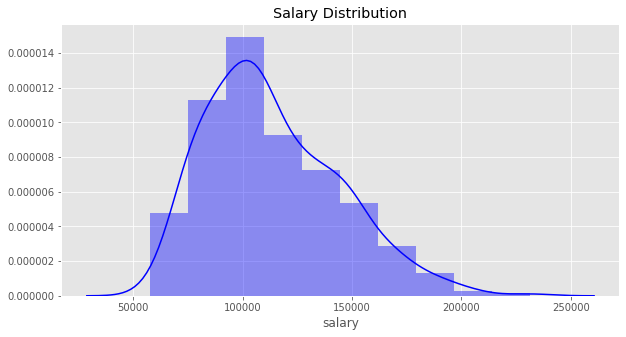

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
#show the distribution about the salary
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)
plt.title('Salary Distribution')
sns.distplot(data['salary'],  bins = 10, color = 'blue')
plt.show()
#fit = norm, kde = False,

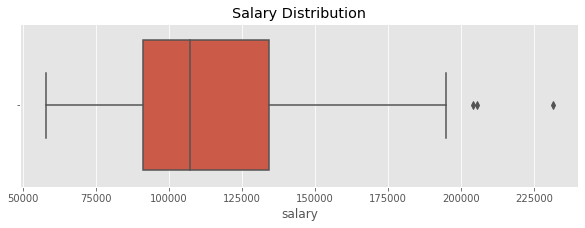

In [4]:
#show the boxplot about the salary
plt.figure(figsize=(10,3))
plt.title('Salary Distribution')
sns.boxplot(x=data['salary'],data=data)
plt.show()

- From the plots above we can see that the distribution of salary is a little right-skewed.
- The mean is 113706.458438. The median is 107300.000000. The SD is 30289.038695.

### 2.Is there different in salaries between gender?
HO : There is no difference in salaries between gender. Male salary ＝ Female salary

HA : There has difference in salaries between gender. Male salary ≠ Female salary

In [5]:
#show the number of male and female
data.groupby(['sex'])['sex'].count()

sex
Female     39
Male      358
Name: sex, dtype: int64

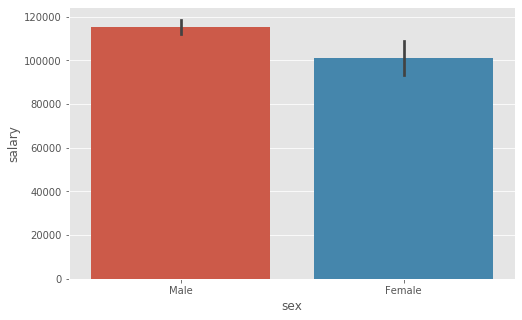

In [22]:
#show the detail about salary in sex
plt.figure(figsize=(8,5))
sns.barplot(x='sex',y='salary',data=data)

In [6]:
import statsmodels.stats.weightstats as st

salaryANDmale = data[data['sex'] == 'Male']['salary']
salaryANDfemale = data[data['sex'] == 'Female']['salary']

dsw1 = st.DescrStatsW(salaryANDmale)
dsw2 = st.DescrStatsW(salaryANDfemale)
cm = st.CompareMeans(dsw1, dsw2)

# calculate number of observations, mean and standard deviation for each group
n_male = dsw1.nobs
n_female = dsw2.nobs
mean_male = dsw1.mean
mean_female = dsw2.mean
sd_male = dsw1.std
sd_female = dsw2.std
print(f'n_male = {n_male}')
print(f'mean_male = {mean_male}')
print(f'sd_male = {sd_male}')
print()
print(f'n_female = {n_female}')
print(f'mean_female = {mean_female}')
print(f'sd_female = {sd_female}')

n_male = 358.0
mean_male = 115090.41899441341
sd_male = 30394.387941408255

n_female = 39.0
mean_female = 101002.41025641025
sd_female = 25617.24712858652


In [7]:
# conduct hypothesis test
ht = cm.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)

# calculate and print the standard error, the Z-score, and p-value for the hypothesis test
se = cm.std_meandiff_separatevar
testZ = ht[0]
p_value = ht[1]
print(f'Standard error = {se}')
print(f'Test statistic: Z = {testZ}')
print(f'p-value = {p_value}')

# reject or accept null hypothesis
if(p_value) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

Standard error = 4456.151886585023
Test statistic: Z = 3.1614740916740884
p-value = 0.0015697278187671224
reject null hypothesis


- From the result we can get the conclusion that there is different in salaries between gender.

But we don't know whether male's salaries are higher or female's salaries are higher. Let's do one-sided hypothesis test this time.

HO : Male salary ＝ Female salary

HA : Male salary ＞ Female salary

In [8]:
# conduct hypothesis test
ht = cm.ztest_ind(alternative = 'larger', usevar = 'unequal', value = 0)

# calculate and print the standard error, the Z-score, and p-value for the hypothesis test
se = cm.std_meandiff_separatevar
testZ = ht[0]
p_value = ht[1]
print(f'Standard error = {se}')
print(f'Test statistic: Z = {testZ}')
print(f'p-value = {p_value}')

# reject or accept null hypothesis
if(p_value) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

Standard error = 4456.151886585023
Test statistic: Z = 3.1614740916740884
p-value = 0.0007848639093835612
reject null hypothesis


- From the result we can see that male's salaries are significant higher than female's salaries.

### 3.Which variables are more associated with salaries, years since PhD or years of service?

In [9]:
import statsmodels.api as sm


#yrs_service
formula_string1 = "salary ~ yrs_service"

model = sm.formula.ols(formula = formula_string1, data = data)
model_fitted = model.fit()

print(model_fitted.summary())

#yrs_service
formula_string1 = "salary ~ yrs_service"

model = sm.formula.ols(formula = formula_string1, data = data)
yrs_service_model_fitted = model.fit()

yrs_service_r2 = yrs_service_model_fitted.rsquared

print('salary ~ yrs_service R2 = ', yrs_service_r2)
print('correlation coefficient = ', data['salary'].corr(data['yrs_service']))

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     49.85
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           7.53e-12
Time:                        22:54:50   Log-Likelihood:                -4635.7
No. Observations:                 397   AIC:                             9275.
Df Residuals:                     395   BIC:                             9283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.997e+04   2416.605     41.370      

In [10]:
#yrs_since_phd
formula_string2 = "salary ~ yrs_since_phd"

model = sm.formula.ols(formula = formula_string2, data = data)
model_fitted = model.fit()

print(model_fitted.summary())

#yrs_since_phd
formula_string2 = "salary ~ yrs_since_phd"

model = sm.formula.ols(formula = formula_string2, data = data)
yrs_since_phd_model_fitted = model.fit()

yrs_since_phd_r2 = yrs_since_phd_model_fitted.rsquared

print('salary ~ yrs_since_phd R2 = ', yrs_since_phd_r2)
print('correlation coefficient = ', data['salary'].corr(data['yrs_since_phd']))

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     84.23
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           2.50e-18
Time:                        22:54:51   Log-Likelihood:                -4620.9
No. Observations:                 397   AIC:                             9246.
Df Residuals:                     395   BIC:                             9254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.172e+04   2765.792     33.162

 - Compare to these two output, we can find that 'years since PhD' is more associated with salaries. 
 - Because the correlation coefficient and R-squared score are both higher than 'years of service'.

#### Now we can expand the question. Among all the variables, which one are most strongly associated with salary?

In [11]:
#All variables
m_sub = sm.formula.ols(formula = 'salary ~ rank + discipline + yrs_since_phd + yrs_service + sex', data = data)
multi_reg = m_sub.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     54.20
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           1.79e-48
Time:                        22:54:51   Log-Likelihood:                -4538.9
No. Observations:                 397   AIC:                             9092.
Df Residuals:                     390   BIC:                             9120.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7.886e+04   4990.326  

- From the output we can see, the P-value of 'sex' is the highest. But is higher than 0.05 so we cannot say the coefficient is significant.
- Among all the variables, the most strongly associated is 'years since PhD', then 'years of service'. From this result it also prove our previous conclusion that 'years since PhD' has a higher correlation with salary than 'years of service'.

### ※ Conclusions
- The distribution of salary is a little right-skewed. The mean is 113706.458438. The median is 107300.000000. The SD is 30289.038695.
- There is different in salaries between gender. And male's salaries are significant higher than female's salaries.
- Among 'years since PhD' and 'years of service', 'years since PhD' is more associated with salaries. Among all the variables, the most strongly associated is still 'years since PhD', and then 'years of service'.